In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

clean_path = Path('../data_clean/spotify_top_songs_clean.csv')
df = pd.read_csv(clean_path)

df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')

viz_path = Path('../visualizations')


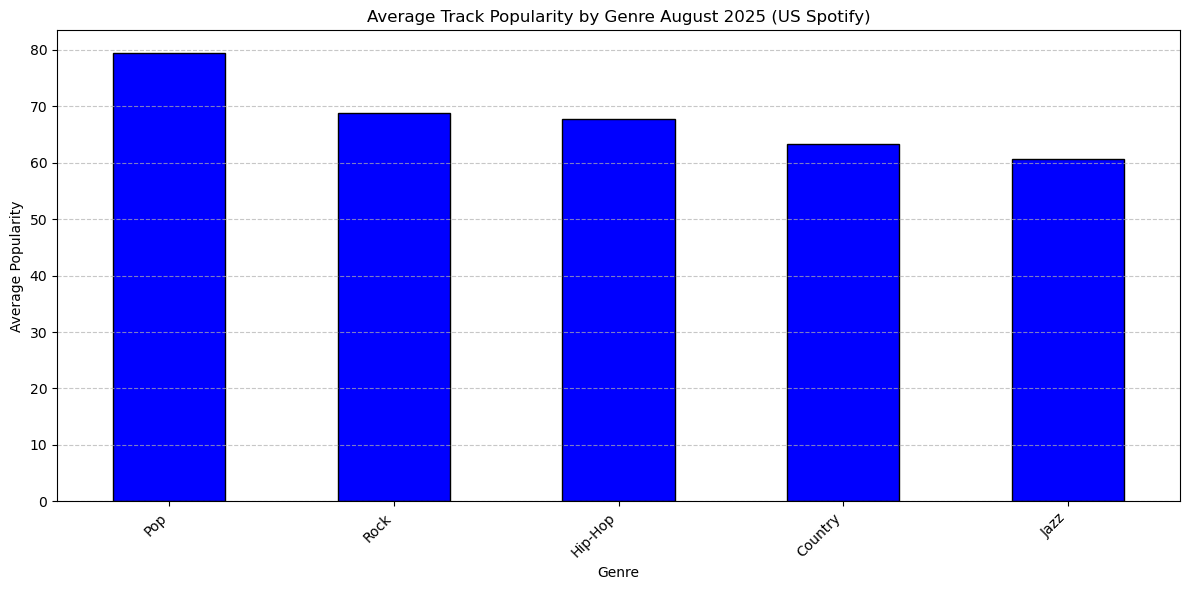

In [ ]:
genre_pop = df.groupby('genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
genre_pop.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Average Track Popularity by Genre August 2025 (US Spotify)')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(viz_path / 'spotify_genre_popularity.png', dpi=300, bbox_inches='tight')
plt.show()


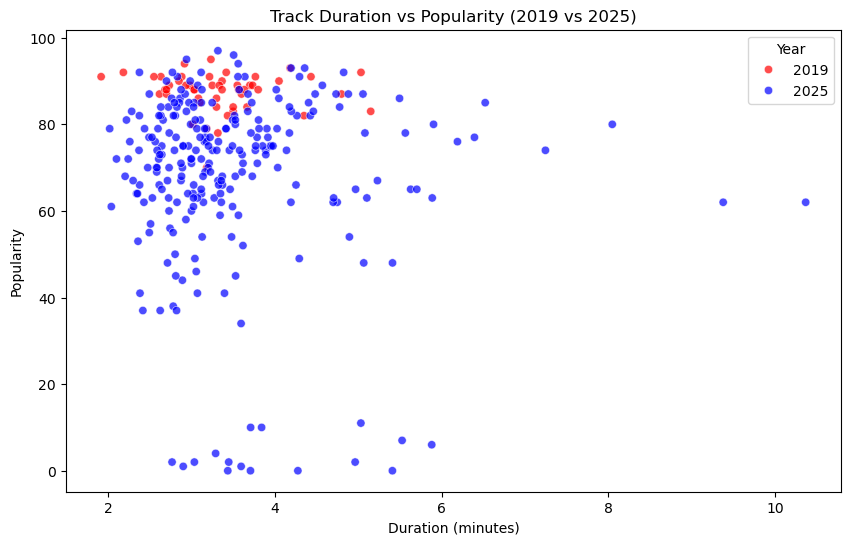

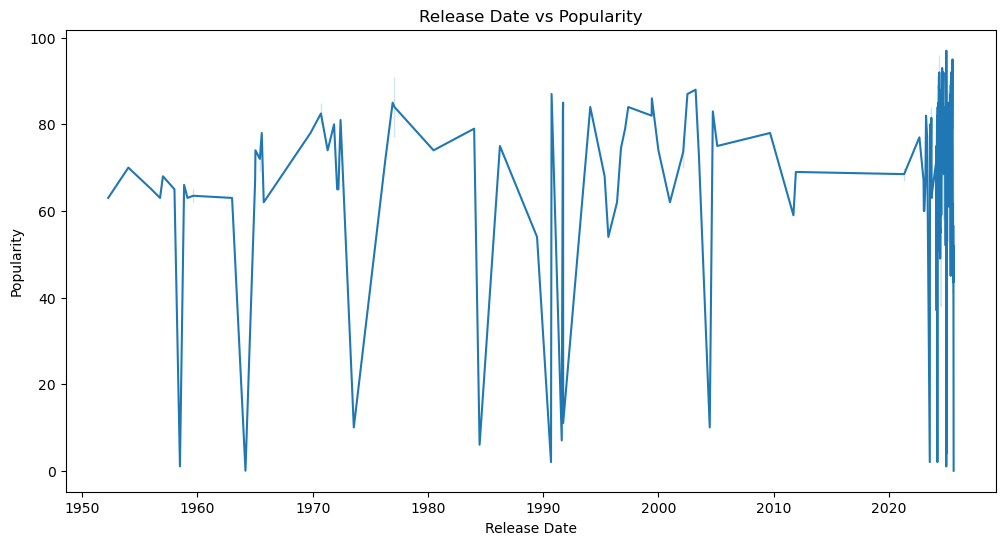

In [ ]:
data = pd.read_csv('../data_clean/spotify_top_songs_clean.csv')
data_2019 = pd.read_csv('../data_clean/top50_2019.csv', encoding='latin1')

data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data['duration_min'] = data['duration_ms'] / 60000
data['year'] = "2025"

data_2019['duration_min'] = data_2019['Length.'] / 60
data_2019['year'] = "2019"

# track duration v popularity
tracks_2019 = data_2019[['duration_min', 'Popularity', 'year']].rename(columns={'Popularity':'popularity'})
tracks_2025 = data[['duration_min', 'popularity', 'year']]

combined = pd.concat([tracks_2019, tracks_2025])
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='duration_min',
    y='popularity',
    hue='year',
    palette={'2019':'red','2025':'blue'},
    data=combined,
    alpha=0.7
)
plt.title('Track Duration vs Popularity (2019 vs 2025)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.legend(title='Year')
plt.savefig(viz_path / 'duration_vs_pop_2019_2025.png', dpi=300, bbox_inches='tight')
plt.show()

# release date v popularity
plt.figure(figsize=(12,6))
sns.lineplot(x='release_date', y='popularity', data=data)
plt.title('Release Date vs Popularity')
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.savefig(viz_path / 'date_vs_pop.png', dpi=300, bbox_inches='tight')
plt.show()


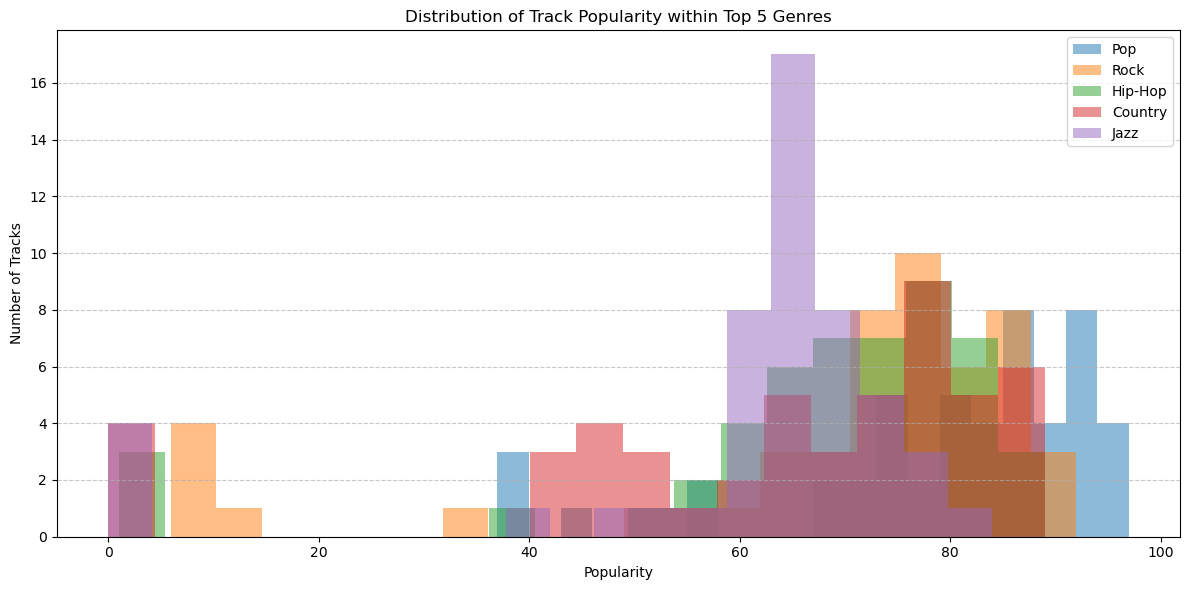

In [15]:
top5_genres = genre_pop.head(5).index
df_top5 = df[df['genre'].isin(top5_genres)]

plt.figure(figsize=(12,6))
for genre in top5_genres:
    plt.hist(df_top5[df_top5['genre'] == genre]['popularity'], bins=20, alpha=0.5, label=genre)

plt.title('Distribution of Track Popularity within Top 5 Genres')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(viz_path / 'spotify_track_popularity.png', dpi=300, bbox_inches='tight')
plt.show()

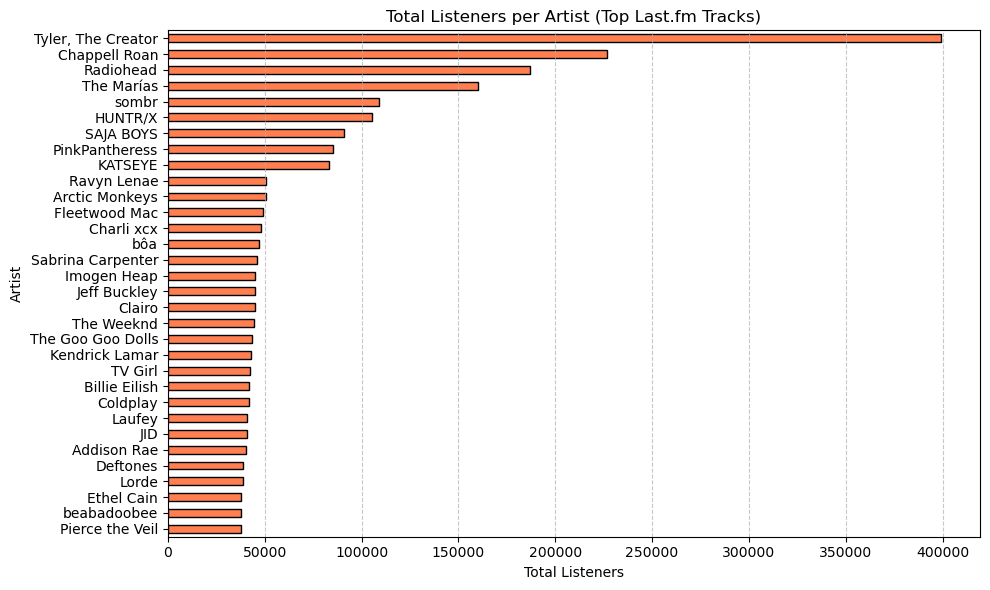

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

lastfm_path = Path('../data_clean/lastfm_top_tracks.csv')
df_lastfm = pd.read_csv(lastfm_path)

df_lastfm['listeners'] = pd.to_numeric(df_lastfm['listeners'], errors='coerce')

artist_listeners = df_lastfm.groupby('artist_name')['listeners'].sum().sort_values(ascending=True)

plt.figure(figsize=(10,6))
artist_listeners.plot(kind='barh', color='coral', edgecolor='black')
plt.title('Total Listeners per Artist (Top Last.fm Tracks)')
plt.xlabel('Total Listeners')
plt.ylabel('Artist')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig(viz_path / 'lastfm_listeners.png', dpi=300, bbox_inches='tight')
plt.show()


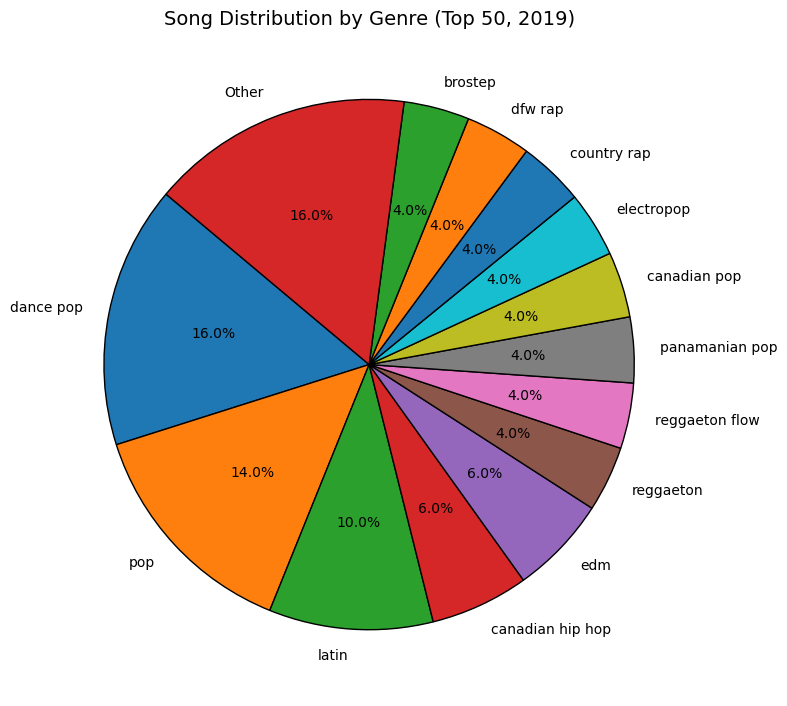

In [ ]:
df_2019 = pd.read_csv("../data_clean/top50_2019.csv", encoding="latin1")
genre_counts = df_2019["Genre"].value_counts()
genre_percent = (genre_counts / genre_counts.sum()) * 100

genre_counts_filtered = genre_counts.copy()
genre_counts_filtered[genre_percent < 4] = 0  # set small categories to 0
other_count = genre_counts[genre_percent < 4].sum()
if other_count > 0:
    genre_counts_filtered["Other"] = other_count

genre_counts_filtered = genre_counts_filtered[genre_counts_filtered > 0]

plt.figure(figsize=(8,8))
plt.pie(
    genre_counts_filtered,
    labels=genre_counts_filtered.index,
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Song Distribution by Genre (Top 50, 2019)", fontsize=14)
plt.tight_layout()
plt.savefig(viz_path / '2019_genres.png', dpi=300, bbox_inches='tight')
plt.show()

